# Recopilación del código creado

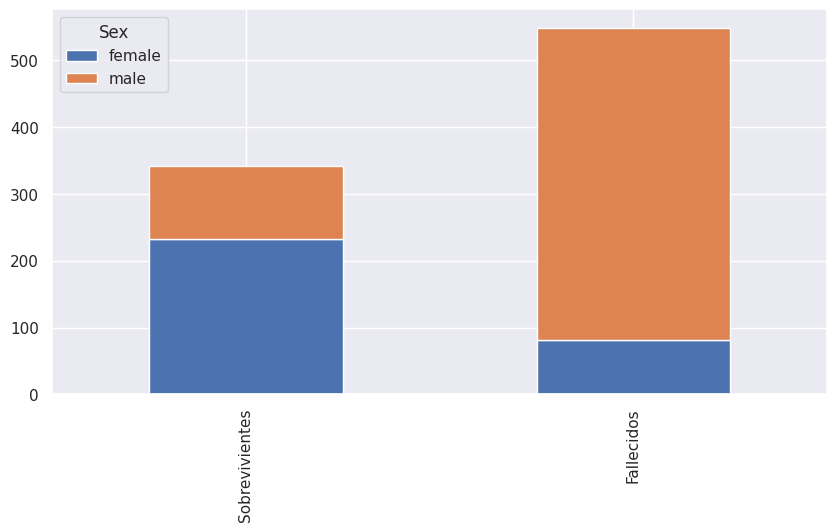

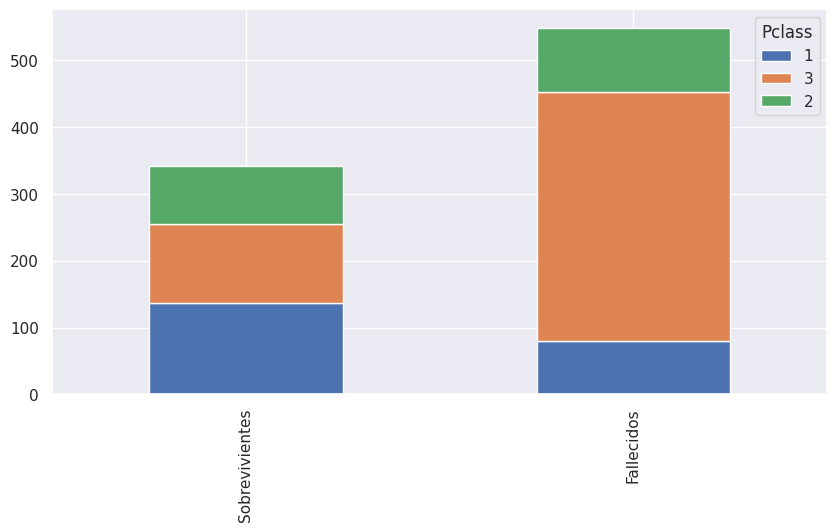

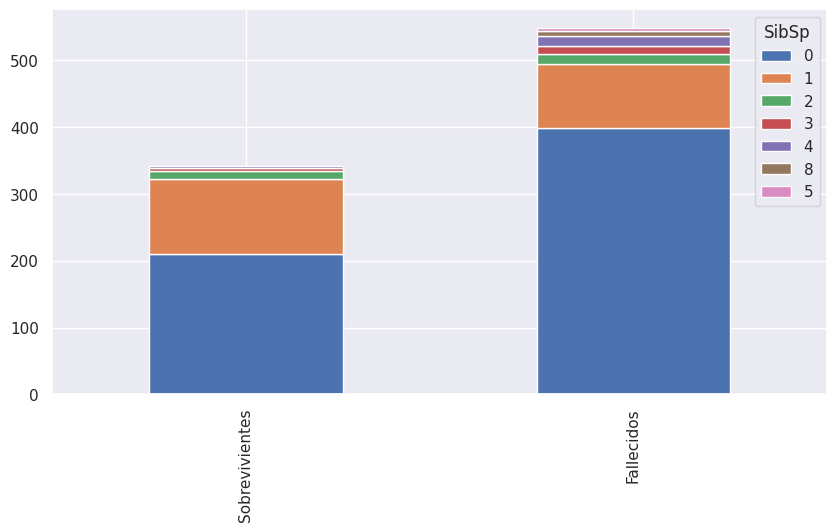

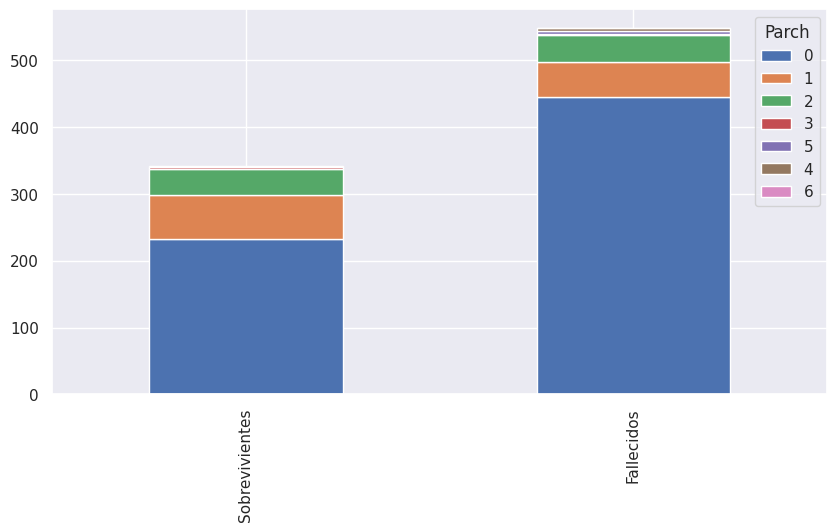

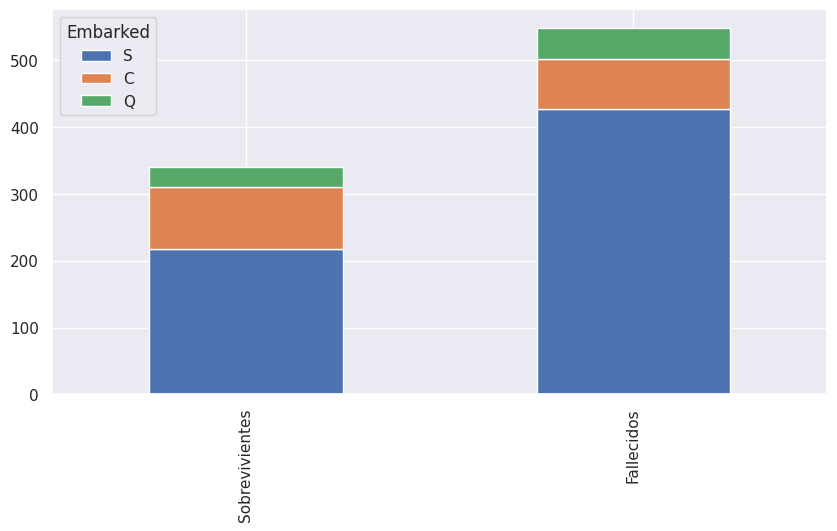

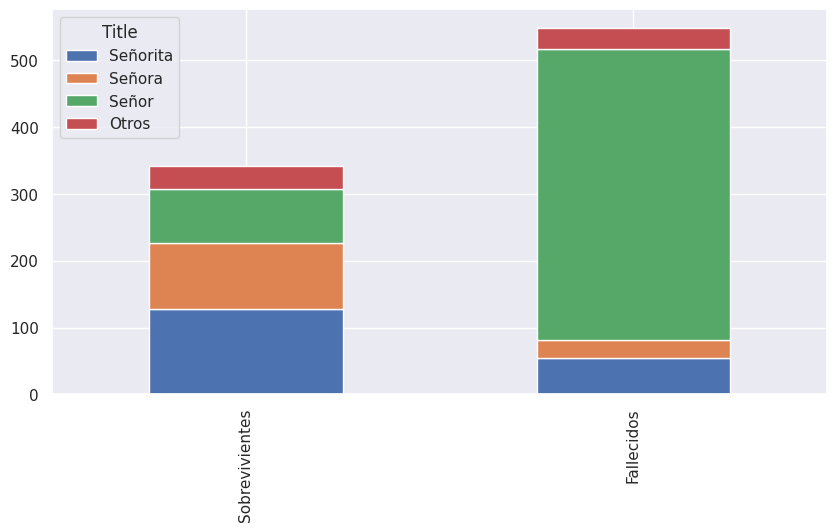

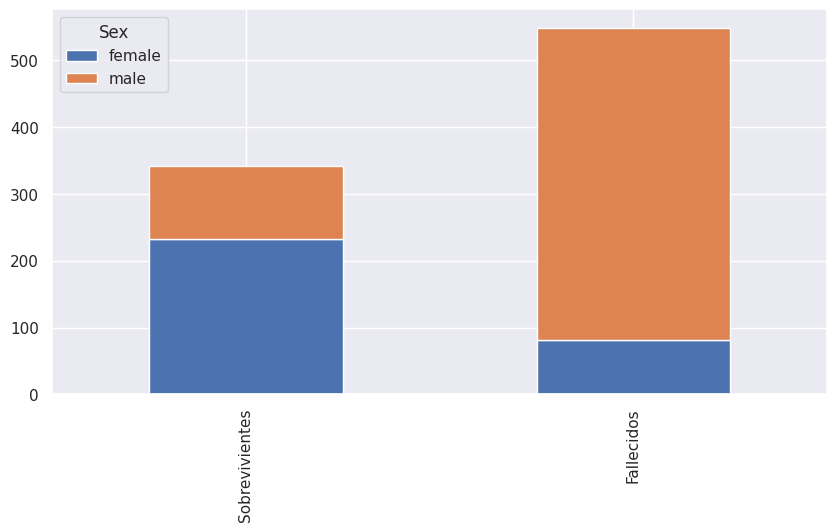

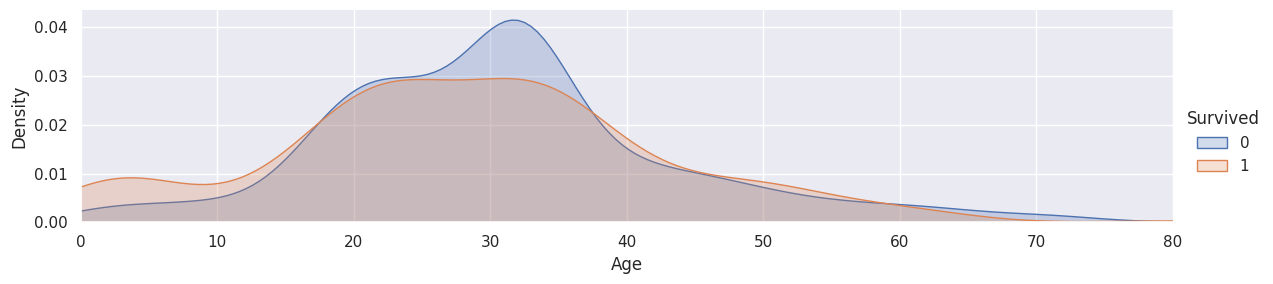

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
 9   Title        891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB
Análisis Descriptivo de 'Fare':
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Análisis Descriptivo de 'Embarked' (One-Hot Encoded):
       Embarked_Q Embarked_S
count         891        

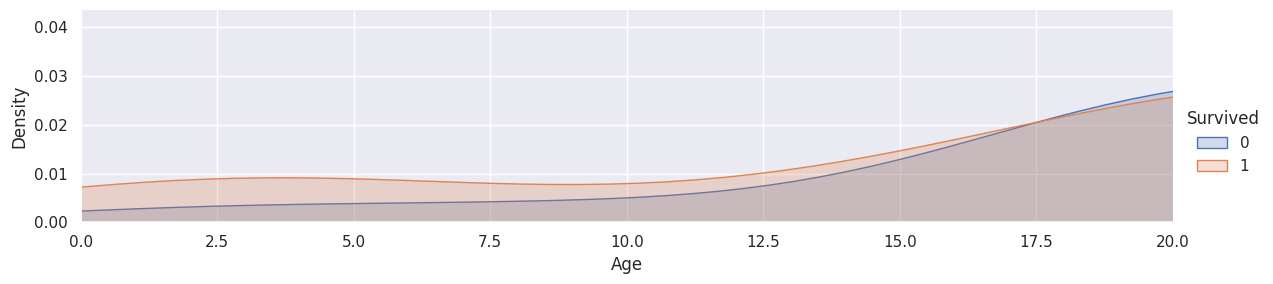

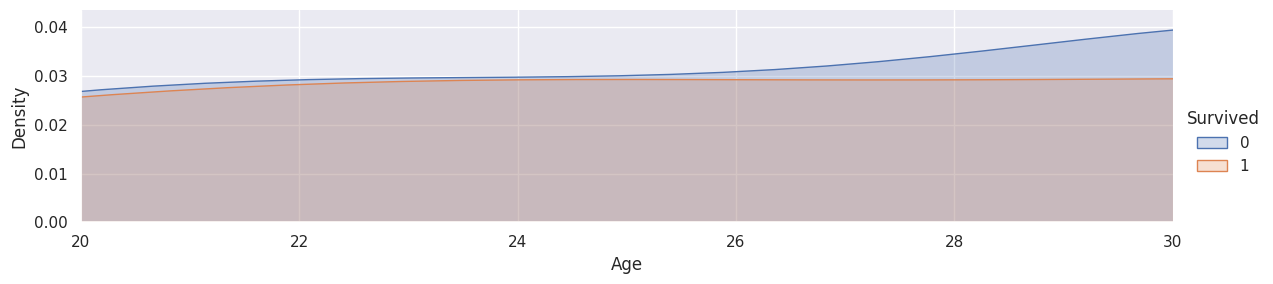

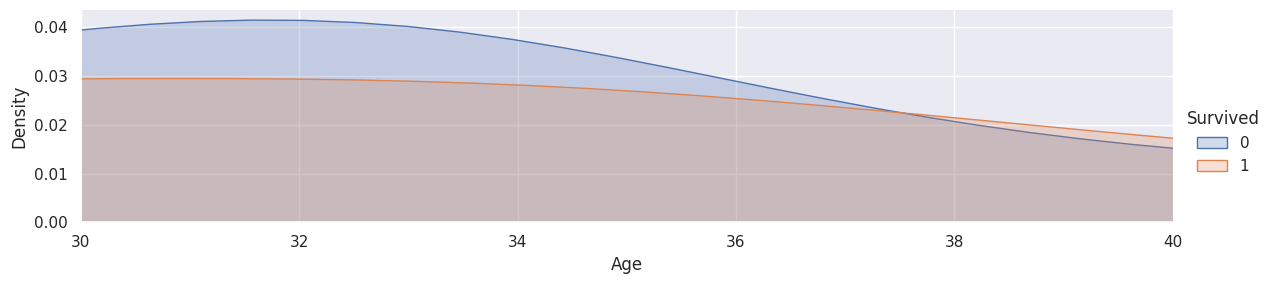

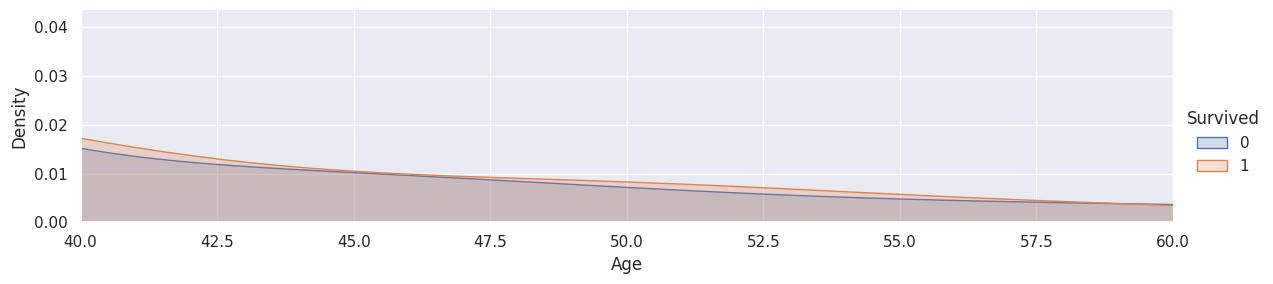

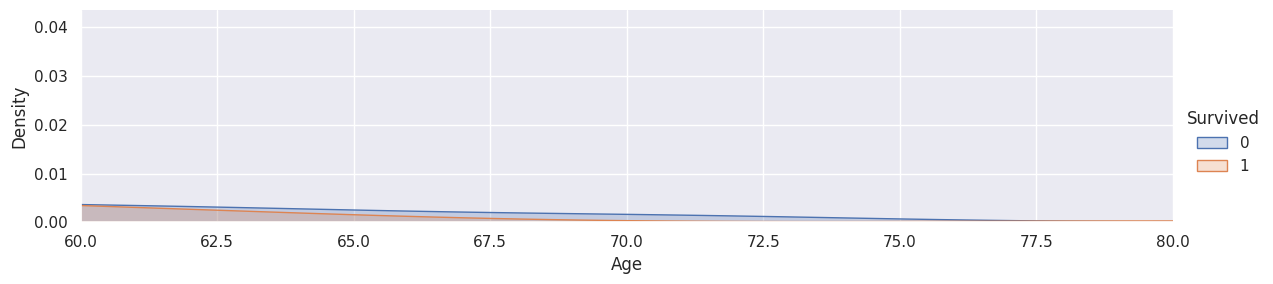

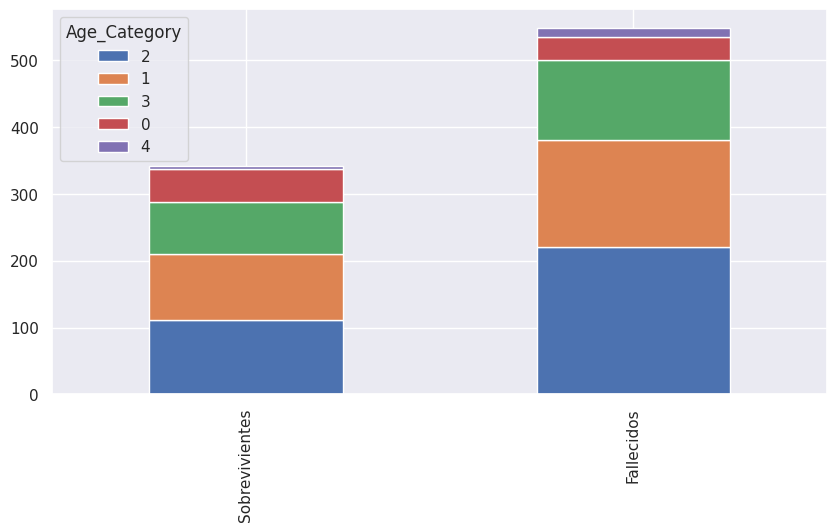

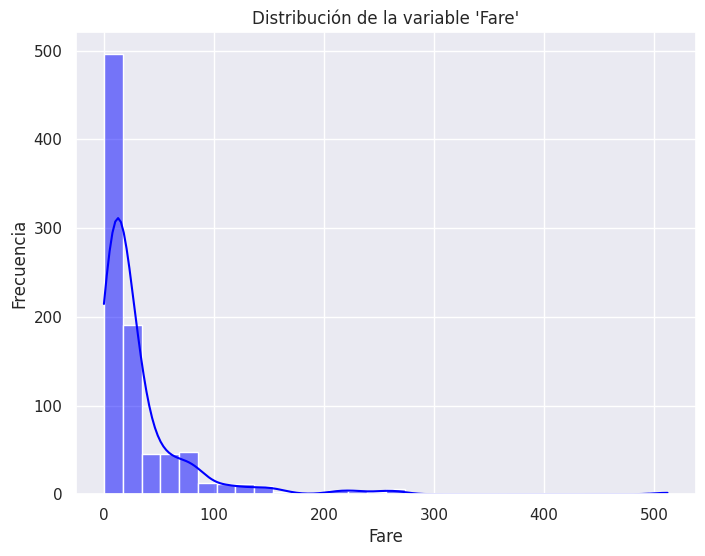

<ipython-input-1-566b30f6bd60>:254: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=df, palette='Set2')


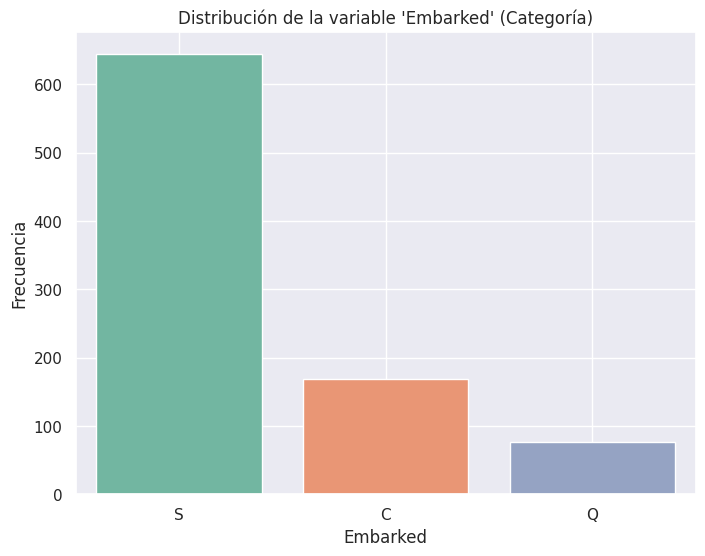

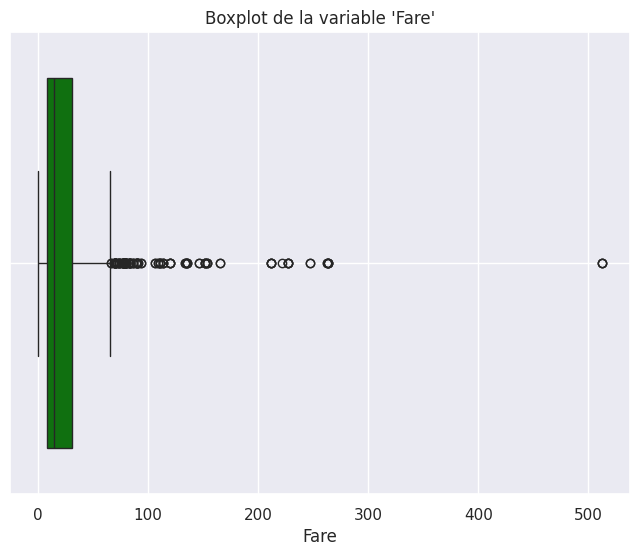

<ipython-input-1-566b30f6bd60>:271: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Embarked', y='Fare', data=df, palette='Set1')


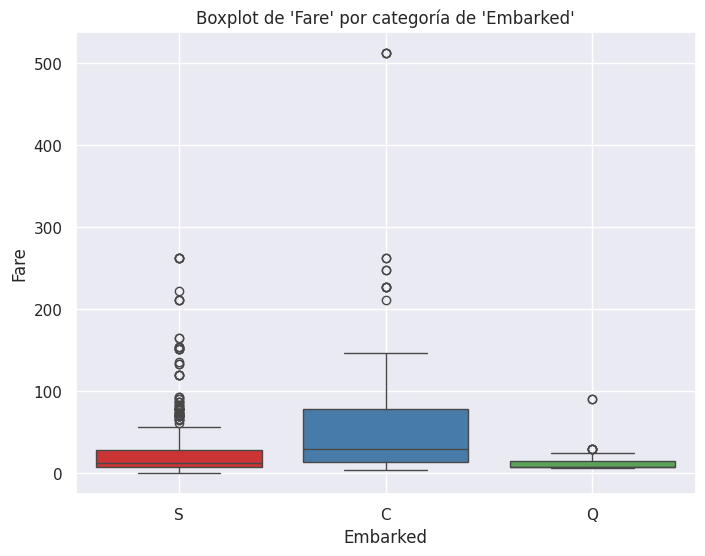

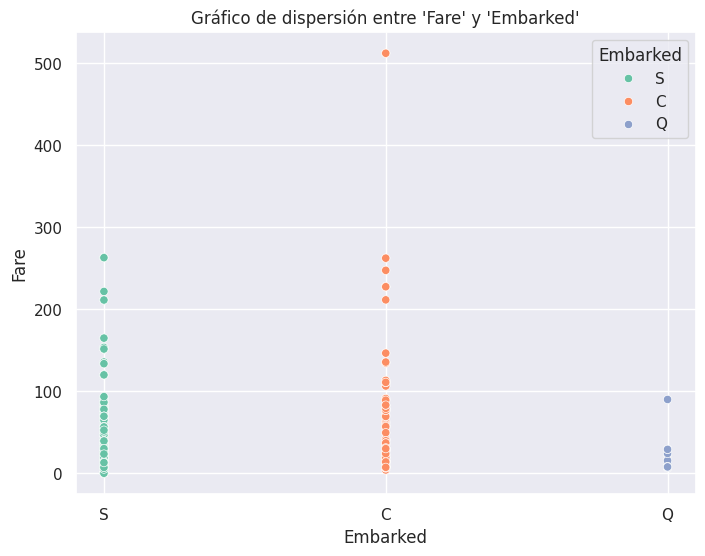

Análisis Descriptivo de 'Fare' por 'Pclass':
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

Análisis Descriptivo de 'Fare' por 'Age Group':
               count       mean        std     min       25%       50%  \
Age_group                                                                
Niño            68.0  31.834803  26.504422  8.5167  19.14060  27.82500   
Joven           45.0  30.292969  40.296246  7.0542   8.02920  11.24170   
Adulto         526.0  25.106082  39.638013  0.0000   7.85420  10.31665   
Edad madura    178.0  47.917041  74.796569  0.0000  11.09375  26.00000   
Edad avanzada   74.0  46.364415  49.480722  6.2375  12.64375  27.63125   

       

<ipython-input-1-566b30f6bd60>:302: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_by_age_group = df.groupby('Age_group')['Fare'].describe()
<ipython-input-1-566b30f6bd60>:306: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = df.groupby('Age_group')['Survived'].mean()
<ipython-input-1-566b30f6bd60>:317: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='No_payment', data=df, palette='Set2')


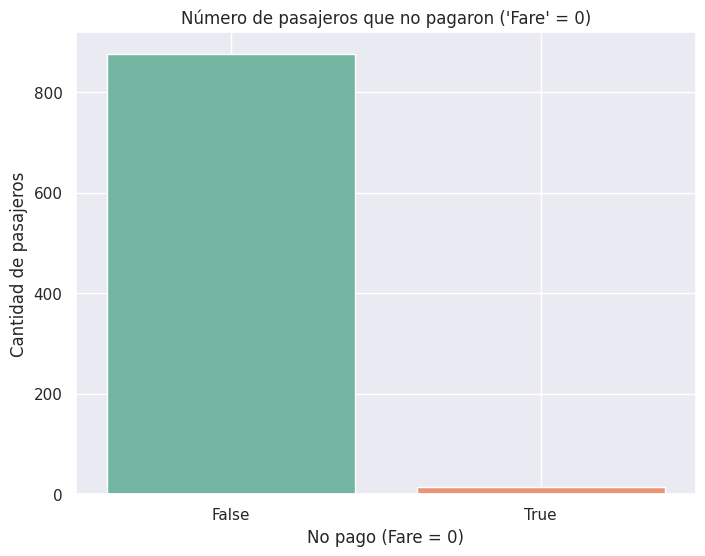

<ipython-input-1-566b30f6bd60>:326: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set1')


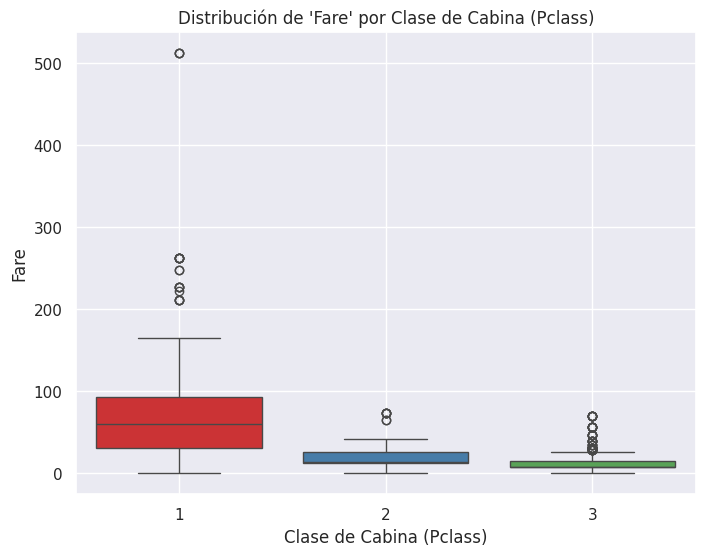

<ipython-input-1-566b30f6bd60>:335: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age_group', y='Fare', data=df, palette='Set1')


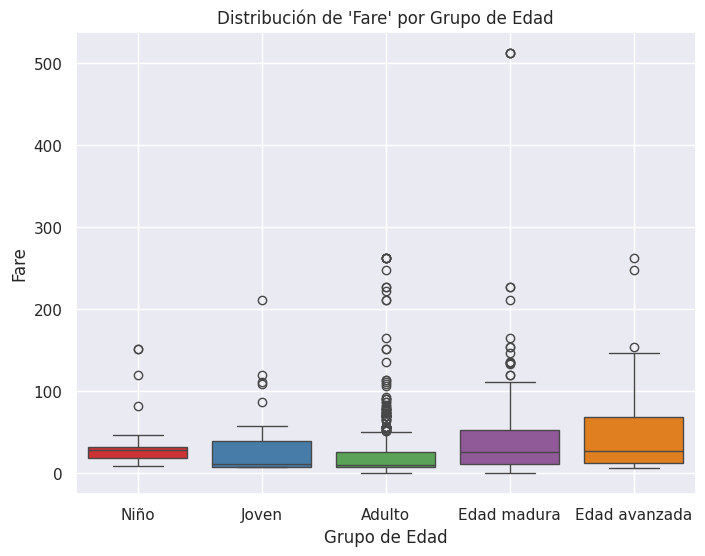

<ipython-input-1-566b30f6bd60>:344: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_class.index, y=survival_by_class.values, palette='Set2')


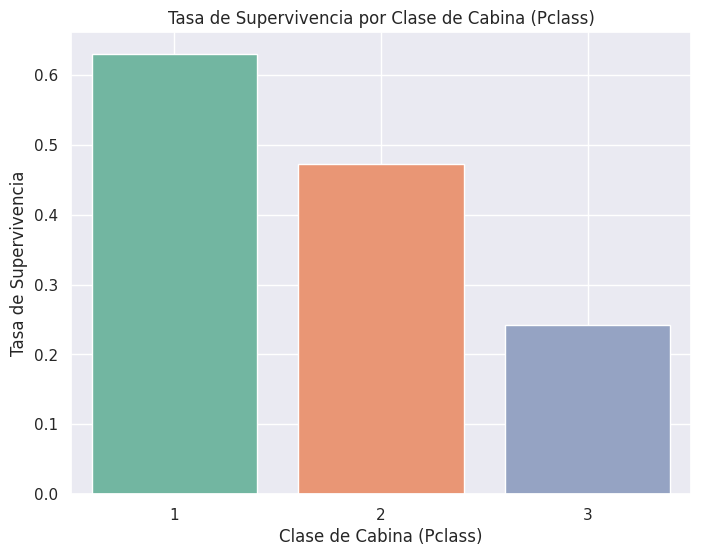

<ipython-input-1-566b30f6bd60>:353: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_age_group.index, y=survival_by_age_group.values, palette='Set3')


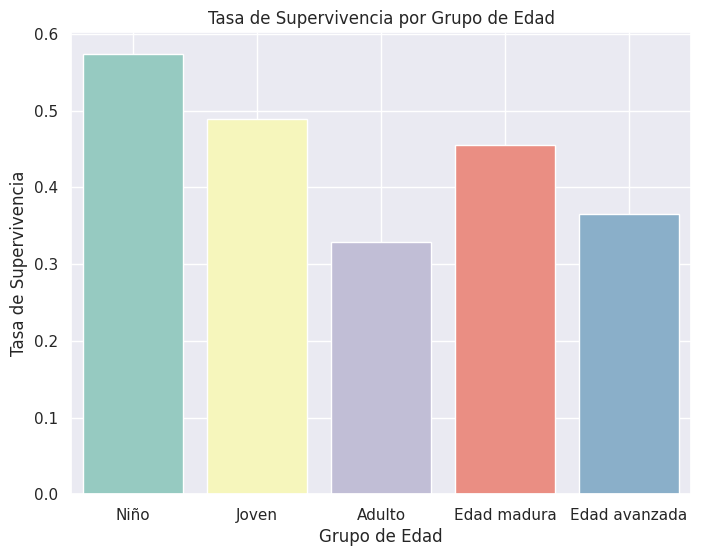

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/nt246/NTRES-6100-data-science/master/datasets/Titanic.csv")

df.isnull()

df.isnull().sum()

total=df.isnull().sum().sort_values(ascending=False)
total

df.isnull().count()

porcentajes=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
porcentajes

datos_perdidos=pd.concat([total,porcentajes],axis=1,keys=['Total','Porcentaje'])
datos_perdidos

def plot_learning_curve(estimator,title,X,y,xlim=None,cv=None,n_jobs=1,train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Ejemplos de entrenamiento")
    plt.ylabel("Puntuación de validación")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Puntuación de entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Puntuación de validación")

    plt.legend(loc="best")
    return plt

import pandas as pd

from IPython.display import Image


notas = pd.read_csv("https://raw.githubusercontent.com/nt246/NTRES-6100-data-science/master/datasets/Notes.csv")
notas

# Commented out IPython magic to ensure Python compatibility.
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

## """##1. Analizando la relación entre las features con la probabilidad de supervivencia / mortalidad del TITANIC"""

def bar_chart(feature):
    survived = df[df['Survived']==1][feature].value_counts()
    dead =  df[df['Survived']==0][feature].value_counts()
    test = pd.DataFrame([survived,dead])
    test.index = ['Sobrevivientes','Fallecidos']
    test.plot(kind='bar',stacked=True, figsize=(10,5))

bar_chart('Sex')

## """La gráfica señala que las **mujeres** sobrevivieron más que los **hombres**"""

bar_chart('Pclass')

## """La gráfica señala que la **clase 1** sobrevieron más que las **otras clases**

##La gráfica señala que la **clase 3** fallecieron más que las **otras clases**

bar_chart('SibSp')

## """La gráfica señala que **una persona casada o con hermanos** tuvo más probabilidad de supervivencia que una persona **soltera**."""

bar_chart('Parch')

## """La gráfica muestra que **una persona con dos o más hijos** tuvo más probabilidad de supervivencia que una persona **que abordó sola**."""

bar_chart('Embarked')

## """La gráfica confirma que:
## * **Una persona que abordó desde C** tuvo una ligera probabilidad de sobrevivir.
## * **Una persona que abordó desde Q o S** probablemente murió.

#Ingenieria de características
## Es el proceso de usar el dominio de conocimiento de los datos para crear nuevas características (feature vectors) que logre que los algoritmos de machine learning funcionen correctamente.

## Feature vector es un vector n-dimensional que representa un objeto. Muchos algoritmos en machine learning requieren una representación numérica de los objetos, ya que tales representaciones ## facilitan el procesamiento y el análisis estadístico.

## ## Cómo se hundió el titanic?
## De acuerdo a lo conocido, por la proa del barco donde estaban las habitaciones de tercera clase

## Conclusión, Pclass es la característica clave para el clasificador

df.head()

## """##2. Creando nuevos vector features"""

def extract_title(data):
    titles=data["Name"].str.extract('([A-Za-z]+)\.',expand=True)
    return titles

df["Title"]=extract_title(df)

df["Title"].value_counts()

## """##2.1 Creando un mapeo de los títulos
## Para ello, reemplazaremos los títulos encontrados por los siguientes valores:
## * Mr: 0
## * Miss: 1
## * Mrs = 2
## * Otros = 3

def replace_titles(data):
  title_mapping = {"Mr": "Señor", "Miss": 'Señorita', "Mrs": "Señora"}
  data['Title'] = data['Title'].map(title_mapping).fillna("Otros")
  return data

df=replace_titles(df)
df[['Name', 'Title']].head()

bar_chart("Title")

#Eliminando información innecesaria del dataset
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

df.head()

## """##2.3 Analizando el sexo"""

bar_chart("Sex")

## """##2.4 EDAD
### 2.4.1 Arreglando las edades faltantes
## Vamos a emplear la media de los títlulos para llenar las edades faltantes.

title_age_means = df.groupby('Title')['Age'].mean()
title_age_means

df['Age'] = df.apply(lambda row: title_age_means[row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1)

df[['Title', 'Age']].head(30)

#df["Age"].fillna(df.groupby("Title")["Age"].transform("median"), inplace=True)

#df.sample(30)
#df.groupby("Title")["Age"].transform("median")

facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()

plt.show()

facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(60)

df.info()

## """###2.4.2 Binning
## Es convertir una variable numérica a categórica, en este caso, la edad.

## Mapeo del feature vector:
## * niño: 0
## * joven: 1
## + adulto: 2
## * edad madura: 3
## * edad avanzada : 4
## """

df['Age_Category'] = pd.cut(df['Age'], bins=[0, 16, 26, 36, 62, float('inf')], labels=[0, 1, 2, 3, 4], right=False)

df.head()

bar_chart("Age_Category")

df.head() ## Se muestra la database

df.isnull()

## Se exporta la database para ver de forma manual si existen missing values alguna parte
df.to_csv("Titanic_data.csv", index=False)

### Análisis Desagrupado

# Convertir 'Embarked' a variables dummy (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Análisis descriptivo de 'Embarked' y 'Fare'
# Descripción estadística para 'Fare'
fare_description = df['Fare'].describe()

# Descripción estadística de la variable 'Embarked' (Ahora ya está en variables dummy)
embarked_description = df_encoded[['Embarked_Q', 'Embarked_S']].describe()

# Mostrar las descripciones
print("Análisis Descriptivo de 'Fare':")
print(fare_description)
print("\nAnálisis Descriptivo de 'Embarked' (One-Hot Encoded):")
print(embarked_description)

# Gráficas estadísticas
# 1. Histograma de 'Fare'
plt.figure(figsize=(8, 6))
sns.histplot(df['Fare'], kde=True, bins=30, color='blue')
plt.title("Distribución de la variable 'Fare'")
plt.xlabel('Fare')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# 2. Gráfico de barras para 'Embarked' (antes de One-Hot Encoding)
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', data=df, palette='Set2')
plt.title("Distribución de la variable 'Embarked' (Categoría)")
plt.xlabel('Embarked')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# 3. Boxplot de 'Fare' para analizar posibles outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Fare'], color='green')
plt.title("Boxplot de la variable 'Fare'")
plt.xlabel('Fare')
plt.grid(True)
plt.show()

# 4. Boxplot de 'Fare' por las categorías de 'Embarked' (antes de One-Hot Encoding)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Embarked', y='Fare', data=df, palette='Set1')
plt.title("Boxplot de 'Fare' por categoría de 'Embarked'")
plt.xlabel('Embarked')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

# 5. Gráfico de dispersión (scatter plot) entre 'Fare' y 'Embarked' (antes de One-Hot Encoding)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Embarked', y='Fare', data=df, hue='Embarked', palette='Set2')
plt.title("Gráfico de dispersión entre 'Fare' y 'Embarked'")
plt.xlabel('Embarked')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

### Análisis Agrupado Por Tipo De Cabina

# Crear una nueva columna para la edad de los pasajeros según las categorías definidas
age_bins = [-np.inf, 12, 18, 35, 50, np.inf]  # Rangos de edad
age_labels = ['Niño', 'Joven', 'Adulto', 'Edad madura', 'Edad avanzada']
df['Age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Crear un grupo para aquellos que no pagaron nada (Fare = 0)
df['No_payment'] = df['Fare'] == 0

# Análisis descriptivo de tarifas por tipo de cabina (Pclass) y grupo de edad
# Para 'Fare' por 'Pclass'
fare_by_class = df.groupby('Pclass')['Fare'].describe()

# Para 'Fare' por grupo de edad
fare_by_age_group = df.groupby('Age_group')['Fare'].describe()

# Para supervivencia según clase y grupo de edad
survival_by_class = df.groupby('Pclass')['Survived'].mean()
survival_by_age_group = df.groupby('Age_group')['Survived'].mean()

# Imprimir los resultados descriptivos
print("Análisis Descriptivo de 'Fare' por 'Pclass':")
print(fare_by_class)
print("\nAnálisis Descriptivo de 'Fare' por 'Age Group':")
print(fare_by_age_group)

# Gráficas estadísticas
# 1. Histograma de 'Fare' para aquellos que no pagaron
plt.figure(figsize=(8, 6))
sns.countplot(x='No_payment', data=df, palette='Set2')
plt.title("Número de pasajeros que no pagaron ('Fare' = 0)")
plt.xlabel("No pago (Fare = 0)")
plt.ylabel("Cantidad de pasajeros")
plt.grid(True)
plt.show()

# 2. Boxplot de 'Fare' por clase de cabina (Pclass)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set1')
plt.title("Distribución de 'Fare' por Clase de Cabina (Pclass)")
plt.xlabel("Clase de Cabina (Pclass)")
plt.ylabel("Fare")
plt.grid(True)
plt.show()

# 3. Boxplot de 'Fare' por grupo de edad (Age Group)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age_group', y='Fare', data=df, palette='Set1')
plt.title("Distribución de 'Fare' por Grupo de Edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Fare")
plt.grid(True)
plt.show()

# 4. Gráfico de barras de la tasa de supervivencia por clase de cabina (Pclass)
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_by_class.index, y=survival_by_class.values, palette='Set2')
plt.title("Tasa de Supervivencia por Clase de Cabina (Pclass)")
plt.xlabel("Clase de Cabina (Pclass)")
plt.ylabel("Tasa de Supervivencia")
plt.grid(True)
plt.show()

# 5. Gráfico de barras de la tasa de supervivencia por grupo de edad
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_by_age_group.index, y=survival_by_age_group.values, palette='Set3')
plt.title("Tasa de Supervivencia por Grupo de Edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Tasa de Supervivencia")
plt.grid(True)
plt.show()

# Desarrollo del taller
Realizado por:


*   Laura Daniela Rojas Ardila
*   Stiven Alexis Villamizar Buitrago


1) Según Wikipedia, se calcula que había 2,224 pasajeros y tripulantes a bordo del Titanic cuando se hundió.


¿De cuántos de ellos tenemos información en este conjunto de datos?


In [2]:
len(df)

891

Respuesta: Hay 891 registros en el conjunto de datos.

De las personas de las que tenemos datos, ¿cuántas sobrevivieron y cuántas no?


In [3]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


Respuesta:



*   Fallecidos: 549
*   Sobrevivientes: 342





¿Cuál es la tasa global de supervivencia?

In [7]:
print(round(df['Survived'].mean() *100,4) , "%")

38.3838 %


Respuesta: Aproximadamente 38.3838%.

2) ¿Cuántos pasajeros del Titanic eran hombres y cuántos mujeres?




In [8]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


Respuesta:

*   Hombres: 577
*   Mujeres: 314


¿Qué se obtiene cuando se desglosa por clase de billete?



In [9]:
pd.crosstab(df['Pclass'], df['Sex'])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


3) ¿Cuántos pasajeros de cada sexo sobrevivieron y cuántos no?


In [10]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


Respuesta:

Fallecidos
*   Fallecieron 81 mujeres
*   Fallecieron 468 hombres

Sobrevivientes
*   Sobrevivieron 233 mujeres
*   Sobrevivieron 109 hombres





¿Cuál es la tasa de supervivencia de los pasajeros de cada sexo?



In [12]:
round(df.groupby('Sex')['Survived'].mean()*100,4)

,Survived
Sex,
female,74.2038
male,18.8908


Respuesta:


*   Mujeres: 74.2038%
*   Hombres: 18.8908%






4) ¿De cuántos pasajeros tenemos información sobre la edad (incluida la edad estimada)?

¿Para cuántos falta información sobre la edad?


In [9]:
df['Age'].isnull().sum()  # Ya fue llenada con la media según título

np.int64(0)

Respuesta: 0 faltantes después del llenado. Originalmente eran 177.

¿Cuál es la distribución por edades de los pasajeros sobre los que se dispone de información?



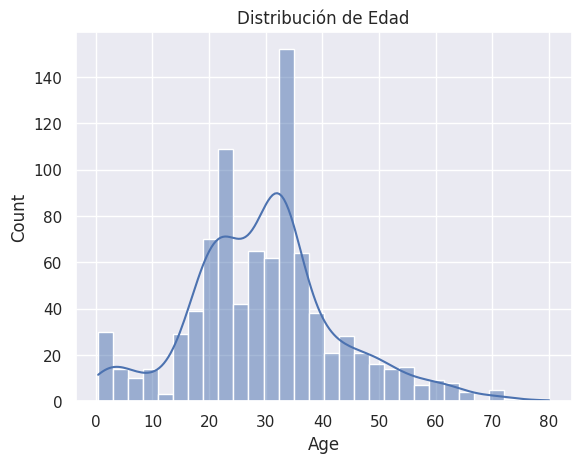

In [10]:
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Distribución de Edad")
plt.show()

Respuesta: Distribución sesgada a la derecha; mayoría entre 20-40 años.

5) Muestre la distribución de edad por clase de billete, por sexo. ¿Qué encuentra?



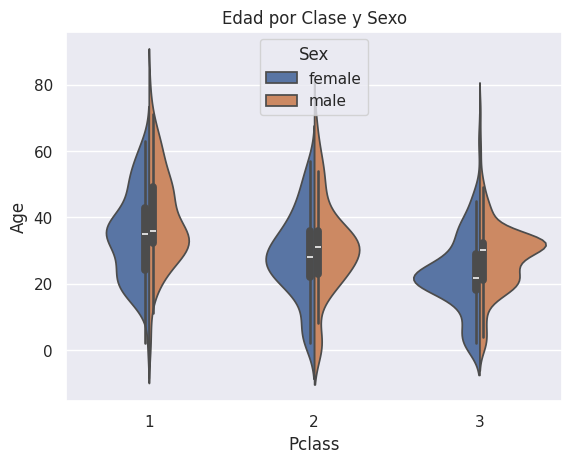

In [17]:
sns.violinplot(x='Pclass', y='Age', hue='Sex', data=df, split=True)
plt.title("Edad por Clase y Sexo")
plt.show()

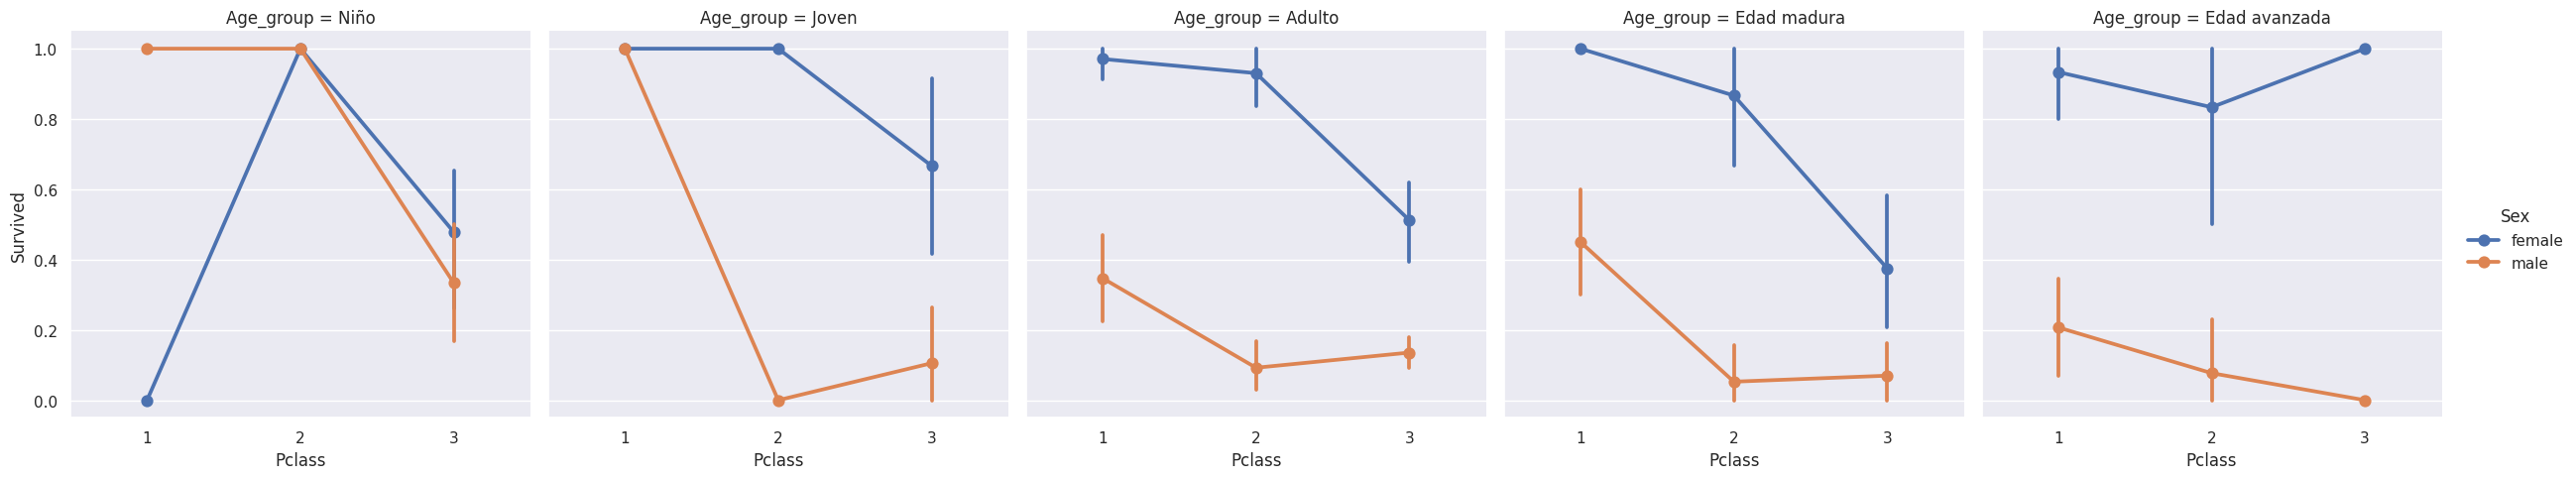

In [18]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Age_group',
            data=df, kind='point')

6) ¿Cómo afectan el sexo, la clase de billete y la edad de un pasajero a sus posibilidades de sobrevivir?
Intenta utilizar un único gráfico para responder a esta pregunta.



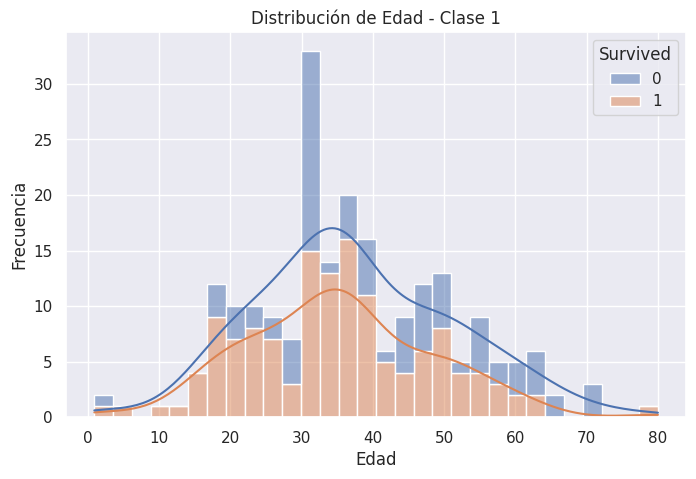

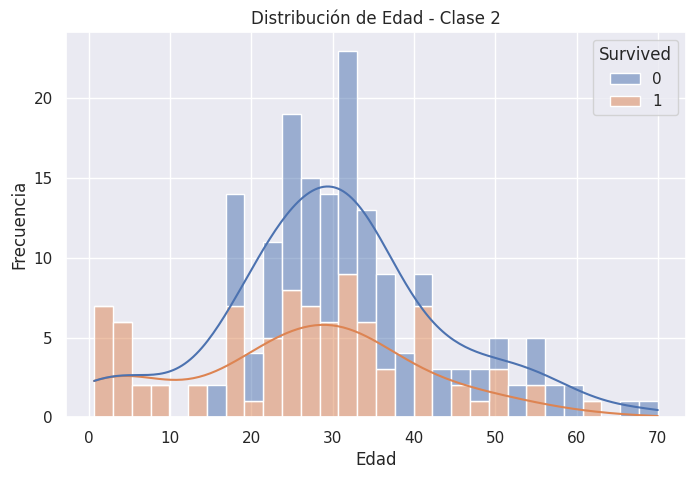

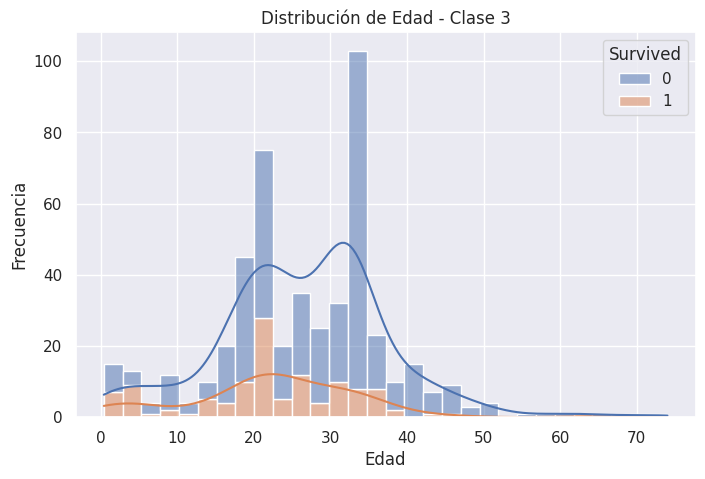

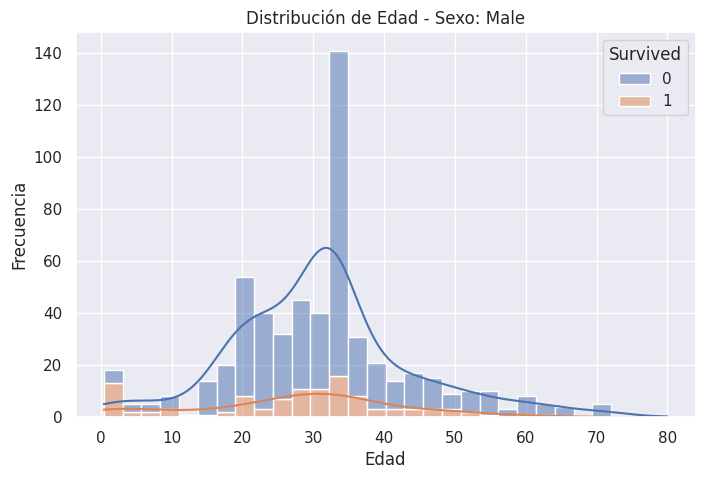

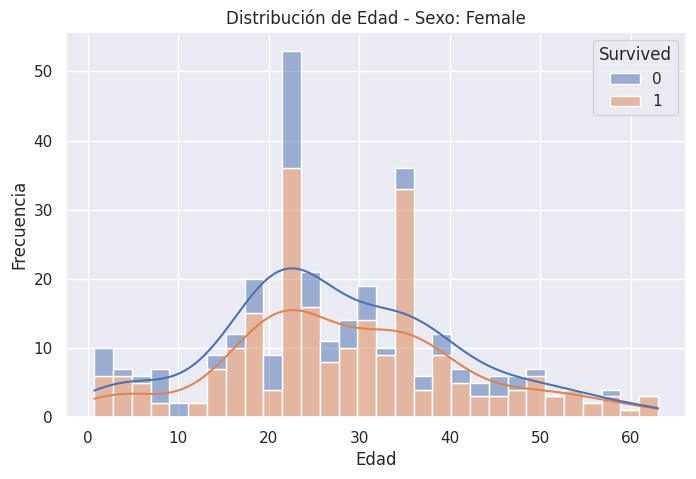

In [19]:
# Edad por clase de billete
for pclass in sorted(df['Pclass'].unique()):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df[df['Pclass'] == pclass], x='Age', bins=30, kde=True, hue='Survived', multiple='stack')
    plt.title(f'Distribución de Edad - Clase {pclass}')
    plt.xlabel('Edad')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

# Edad por sexo
for sex in df['Sex'].unique():
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df[df['Sex'] == sex], x='Age', bins=30, kde=True, hue='Survived', multiple='stack')
    plt.title(f'Distribución de Edad - Sexo: {sex.capitalize()}')
    plt.xlabel('Edad')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()


Conclusión:


*   En 1ra clase hay más adultos mayores. En 3ra, más jóvenes y niños.
*   Ser mujer, estar en primera clase y tener entre 20-40 años aumenta la probabilidad de sobrevivir.


7) Indique la distribución del número de miembros de la familia (incluidos hermanos, cónyuges, padres e hijos) que acompañaban a cada pasajero.
¿La mayoría de los pasajeros viajaban solos o con familia?



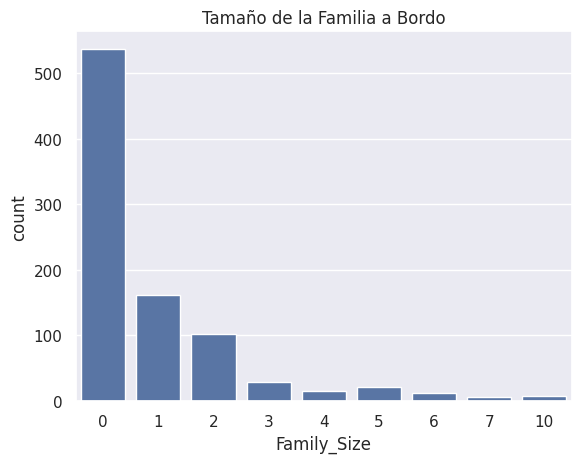

In [20]:
df['Family_Size'] = df['SibSp'] + df['Parch']
sns.countplot(x='Family_Size', data=df)
plt.title("Tamaño de la Familia a Bordo")
plt.show()

Conclusión: La mayoría viajaba sola (Family_Size = 0).

8) ¿En qué clase de billete viajaron la mayoría de las familias numerosas?


In [21]:
familias_grandes = df[df['Family_Size'] >= 5]
familias_grandes['Pclass'].value_counts()

,count
Pclass,
3,42
1,4
2,1


La mayoría de las personas viajaban en 3ra clase, esto incluye la mayoría de las familias numerosas.

¿Y qué clase de billete tiene la menor proporción de pasajeras que viajaron solas de entre todas las pasajeras de esa clase?



In [24]:
mujeres_solas = df[(df['Sex'] == 'female') & (df['Family_Size'] == 0)]
round(mujeres_solas['Pclass'].value_counts(normalize=True) * 100, 4)


,proportion
Pclass,
3,47.6190
1,26.9841
2,25.3968


Respuesta: 1ra clase tiene menor proporción de mujeres que viajaban solas.

9) En este conjunto de datos, la variable Tarifa no representa la tarifa por persona.
En cambio, cada número de billete tiene una tarifa correspondiente, y algunos pasajeros comparten un único número de billete.
Por lo tanto, la variable Tarifa es la tarifa total de un grupo de pasajeros que comparten ese número de billete.
Sabiendo esto, calcule la tarifa media por persona. No es necesario que muestres una tabla o una cifra exacta, pero sí cómo procediste para el cálculo.



In [27]:
# Estimar el tamaño del grupo
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Calcular tarifa por persona
df['Fare_per_person'] = df['Fare'] / df['FamilySize']

# Calcular la tarifa media por persona
tarifa_media = df['Fare_per_person'].mean()
print(f"Tarifa media por persona estimada: {tarifa_media:.2f}")


Tarifa media por persona estimada: 19.92


Respuesta: La tarifa media por persona estimada es de $19.92

10) ¿Cuál es la distribución de la tarifa por billete para cada clase de billete?

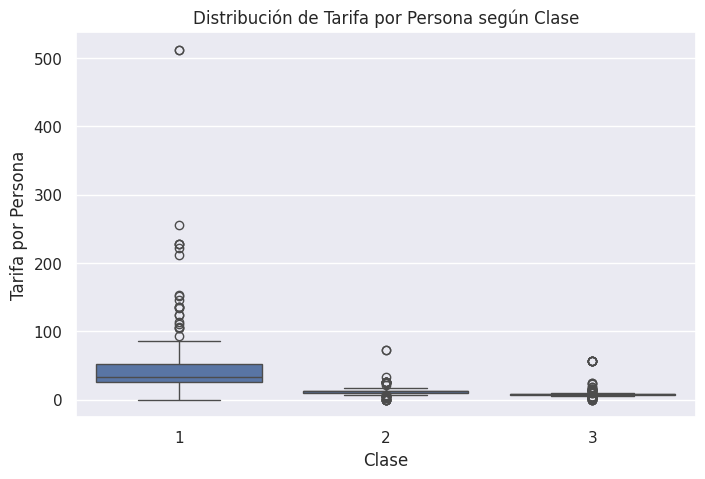

In [33]:
# Verificar si existe la columna necesaria
if 'Fare_per_person' in df.columns:
    plt.figure(figsize=(8, 5))  # Ajustar tamaño de la figura
    sns.boxplot(x='Pclass', y='Fare_per_person', data=df)
    plt.title("Distribución de Tarifa por Persona según Clase")
    plt.xlabel("Clase")
    plt.ylabel("Tarifa por Persona")
    plt.show()
else:
    print("La columna 'Fare_per_person' no existe.")


Respuesta:
La tarifa por persona varía significativamente según la clase del pasajero:

Clase 1: Tarifa por persona más alta, con mayor dispersión. Algunas tarifas son excepcionalmente altas (outliers).

Clase 2: Tarifa media, con menor dispersión que la clase 1.

Clase 3: Tarifa por persona más baja, con valores concentrados en rangos bajos y varios outliers.

Esto refleja el costo significativamente mayor de los boletos en primera clase, incluso por persona estimada, comparado con las otras clases.

Visualmente, el boxplot muestra esta tendencia con cajas y bigotes más altos para la clase 1 y más bajos para la clase 3.